# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [1]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#load and inspect the data
df = pd.read_csv('./reg_data.csv')
# YOUR CODE HERE
print(df.describe())
print(df.head())


                X           Y
count  100.000000  100.000000
mean    48.958341   72.735051
std      9.746379   16.658187
min     25.128485   31.707006
25%     41.526164   60.788586
50%     49.634970   72.179542
75%     56.762631   83.215080
max     70.346076  118.591217
           X          Y
0  32.502345  31.707006
1  53.426804  68.777596
2  61.530358  62.562382
3  47.475640  71.546632
4  59.813208  87.230925


In [3]:
assert df.shape == (100,2)

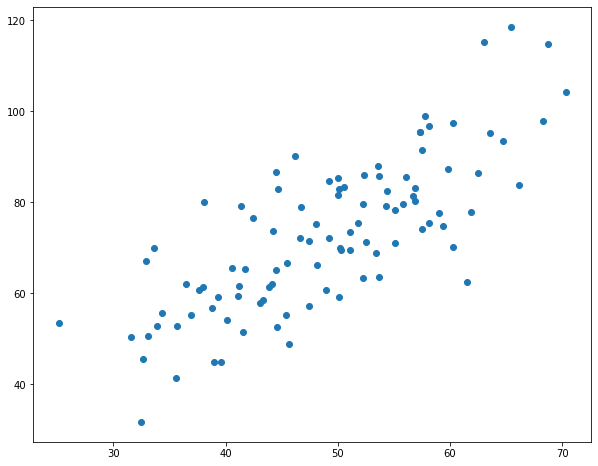

In [4]:
#plot the data (scatter)
# YOUR CODE HERE

X = df.X.values
Y = df.Y.values

fig, ax = plt.subplots(figsize=(10, 8))
ax = plt.scatter(X, Y)



In [5]:
# YOUR CODE HERE
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=0)

In [6]:
assert x_train.shape == (80,)
assert x_test.shape == (20,)
assert y_train.shape == (80,)
assert y_test.shape == (20,)

In [7]:
#implement a least squares function to find a, b

# x_mean = x_train.mean()
# y_mean = y_train.mean()

x_mean = np.mean(x_train)
y_mean = np.mean(y_train)

b_upper = 0
b_lower = 0
b = 0
a = 0
# YOUR CODE HERE

b_upper = sum((x_train - x_mean) * (y_train - y_mean))
b_lower = sum((x_train - x_mean)**2)
b = b_upper/b_lower
a = y_mean - b * x_mean
# a = (y_train.sum() - b * x_train.sum())/len(x_train)

print(b)
print(a)

1.3450919020620415
6.687439682550206


In [8]:
assert abs(a - 7.72) <=0.03
assert abs(b - 1.32) <=0.03

AssertionError: 

In [9]:
line = 0
x = np.arange(0,100)
# YOUR CODE HERE
line = b*x + a


In [10]:
assert abs(a +3*b - 11.69) <= 0.05
assert abs(a +100*b - 140) <= 1

AssertionError: 

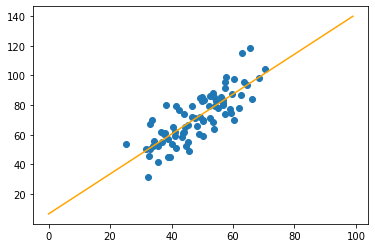

In [11]:
# YOUR CODE HERE
plt.scatter(x_train, y_train)
plt.plot(line, color='orange')
plt.show()

In [25]:
#Classify your test data in to classes
#if the Y value for a certain X is lower than the line then the class is 0
class_0 = []
class_1 = []

# YOUR CODE HERE

for i, y in enumerate(y_test):
    if y < b * x_test[i] + a:
        class_0.append((x_test[i], y))
    else:
        class_1.append((x_test[i], y))


        
class_0 = np.array(class_0)
class_1 = np.array(class_1)
print(class_0.shape)
print(class_1.shape)

(11, 2)
(9, 2)


In [26]:
assert 9 < class_0.shape[0] < 13
assert 7 < class_1.shape[0] < 11

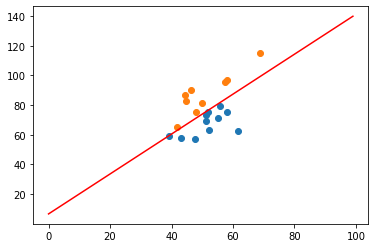

In [28]:
# YOUR CODE HERE

plt.scatter(class_0[:,0], class_0[:,1])
plt.scatter(class_1[:,0], class_1[:,1])
plt.plot(line, color='red')


In [32]:
# get the total error for the classes

err = 0
# YOUR CODE HERE
err = sum(abs(y_test - (b * x_test + a)))
print(err)


201.8244786064339


In [33]:
assert err - 201 < 20